In [5]:
# !pip install numpy==1.23.0


Convolutional Neural Network.

It's a type of deep learning model specifically designed to work with grid-like data, such as images, by using a mathematical operation called convolution. CNNs are particularly effective for tasks like image classification, object detection, and image segmentation.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import pathlib
import matplotlib.pyplot as plt

to fix an issue with loading i implemented lazy loading which loads them into smaller pieces to reduce memory usage

tried 35 epochs before but got 99,6 training and 40 validation

10 epochs
Training Accuracy: 98.60%
Validation Accuracy: 37.86%

5 epochs:


In [11]:
size = 256
batch_size = 32
epochs = 40
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Custom Dataset for lazy loading
class ImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load the image on demand (lazy loading)
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = img.resize((size, size))  # Resize to match your input size

        # Optionally, apply transformations (like normalization, augmentation, etc.)
        if self.transform:
            img = self.transform(img)

        label = self.labels[idx]
        return img, label

# Load file paths and labels
image_paths = []  # List of image file paths
labels = []  # Corresponding labels

for file_info in pathlib.Path("./data").glob("**/*.jpg"):
    image_paths.append(str(file_info))
    labels.append(file_info.parts[1])  # Assuming label is the folder name

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split into train/test (or use all data)
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(image_paths, encoded_labels, test_size=0.2, random_state=42)

# Define image transformations (resize and convert to tensor)
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # Converts to Tensor and normalizes the pixel values to [0, 1]
])

# Create datasets and dataloaders
train_dataset = ImageDataset(train_image_paths, train_labels, transform=transform)
val_dataset = ImageDataset(val_image_paths, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


Epoch 1/40, Loss: 1.9027, Accuracy: 29.83%
Epoch 2/40, Loss: 1.7112, Accuracy: 38.02%
Epoch 3/40, Loss: 1.4020, Accuracy: 50.08%
Epoch 4/40, Loss: 0.9629, Accuracy: 65.94%
Epoch 5/40, Loss: 0.5149, Accuracy: 82.37%
Epoch 6/40, Loss: 0.2447, Accuracy: 92.17%
Epoch 7/40, Loss: 0.1378, Accuracy: 95.80%
Epoch 8/40, Loss: 0.0935, Accuracy: 97.25%
Epoch 9/40, Loss: 0.0864, Accuracy: 97.43%
Epoch 10/40, Loss: 0.0876, Accuracy: 97.54%
Epoch 11/40, Loss: 0.0620, Accuracy: 98.18%
Epoch 12/40, Loss: 0.0666, Accuracy: 98.22%
Epoch 13/40, Loss: 0.0539, Accuracy: 98.43%
Epoch 14/40, Loss: 0.0525, Accuracy: 98.48%
Epoch 15/40, Loss: 0.0541, Accuracy: 98.42%
Epoch 16/40, Loss: 0.0509, Accuracy: 98.54%
Epoch 17/40, Loss: 0.0388, Accuracy: 98.93%
Epoch 18/40, Loss: 0.0443, Accuracy: 98.66%
Epoch 19/40, Loss: 0.0440, Accuracy: 98.73%
Epoch 20/40, Loss: 0.0456, Accuracy: 98.73%
Epoch 21/40, Loss: 0.0286, Accuracy: 99.20%
Epoch 22/40, Loss: 0.0263, Accuracy: 99.24%
Epoch 23/40, Loss: 0.0339, Accuracy: 99.0

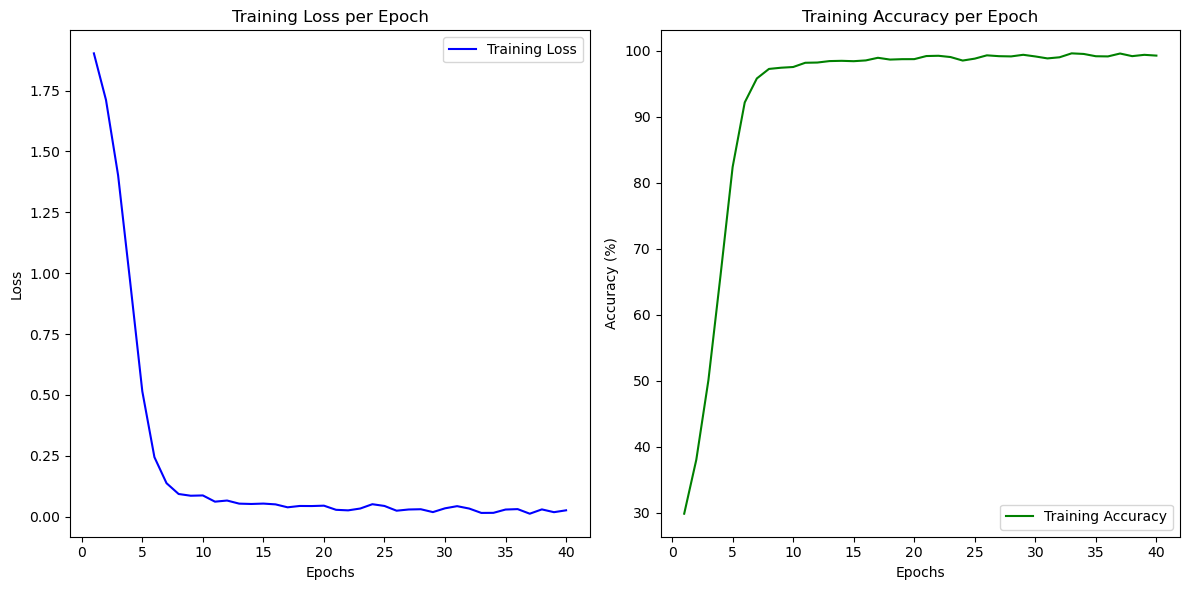

Training Accuracy: 99.42%
Validation Accuracy: 33.56%


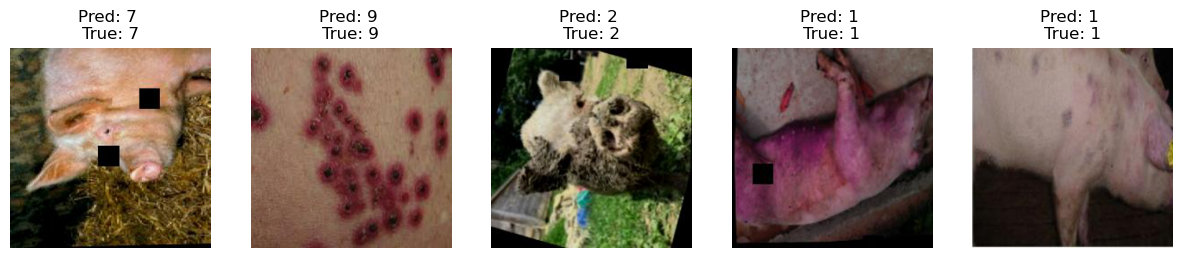

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

# List to store accuracy and loss for each epoch
epoch_losses = []
epoch_accuracies = []

# Training loop with accuracy
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Calculate accuracy for this batch
        _, preds = torch.max(outputs, 1)
        correct_predictions += (preds == targets).sum().item()
        total_predictions += targets.size(0)
    
    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_predictions / total_predictions
    epoch_losses.append(epoch_loss)
    epoch_accuracies.append(epoch_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Plot Loss and Accuracy graphs
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), epoch_losses, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), epoch_accuracies, label='Training Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate accuracy
def calculate_accuracy(loader, model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == targets).sum().item()
            total += targets.size(0)
    return 100 * correct / total

train_acc = calculate_accuracy(train_loader, model)
val_acc = calculate_accuracy(val_loader, model)

print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Validation Accuracy: {val_acc:.2f}%")

# Visualize sample images with predictions
def visualize_predictions(loader, model, num_images=5):
    model.eval()
    data_iter = iter(loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)

    # Get model predictions
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    # Convert images to CPU for plotting
    images = images.cpu().numpy()
    images = np.transpose(images, (0, 2, 3, 1))  # Convert from (B, C, H, W) to (B, H, W, C)

    # Plot images and predictions
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])
        ax.set_title(f"Pred: {preds[i].item()} \nTrue: {labels[i].item()}")
        ax.axis('off')
    plt.show()

# Call visualization function
visualize_predictions(train_loader, model, num_images=5)

